# K-Means 군집화 Lab1

1. boston_housing.csv 파일을 읽어서 boston_df를 만드시오.

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
boston_df = pd.read_csv('../../data/boston_housing.csv')
boston_df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [3]:
boston_scaled = MinMaxScaler().fit_transform(boston_df.drop('medv',axis=1))
boston_scaled_df=pd.DataFrame(data=boston_scaled, columns=boston_df.columns[:-1])

In [4]:
boston_scaled_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [5]:
# Clustering
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300,random_state=0).fit(boston_scaled_df)
boston_df['cluster']=kmeans.labels_

In [6]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 1 1 1 1 1 1 4 4 1 4 1 1 1 4 1 1 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1
 1 1 3 3 1 1 1 1 1 1 1 4 1 1 1 1 1 3 3 3 3 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1
 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 5 5 5 5 5
 5 5 5 5 6 5 6 6 5 5 5 5 6 5 6 6 5 5 5 5 5 5 5 5 4 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 4 6 6 6 6 6 1 1 1 6 4 6 6 6 6
 6 1 1 1 1 1 1 1 1 1 1 1 6 1 6 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 3 3 3 5 5
 5 5 5 5 5 5 5 5 5 1 6 1 1 1 6 6 1 6 6 1 1 1 1 6 3 3 3 3 3 3 3 3 3 3 1 1 1
 1 1 3 3 3 1 3 3 1 1 1 1 4 4 1 1 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3
 1 1 1 1 1 1 1 1 3 1 3 3 1 1 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 4 4 4 4 4 

In [ ]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(boston_scaled_df)

boston_df['pca_x'] = pca_transformed[:,0]
boston_df['pca_y'] = pca_transformed[:,1]

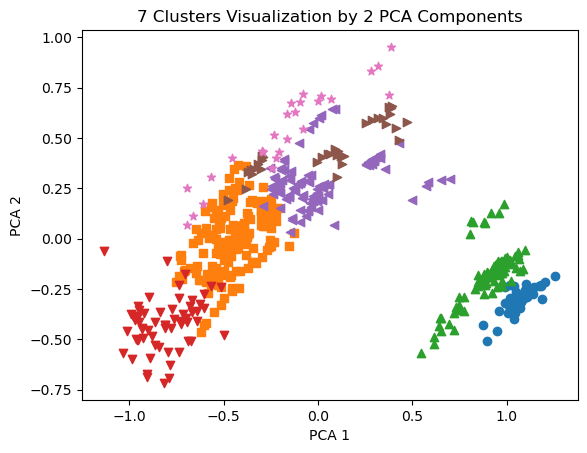

In [11]:
# Plotting
# Index extraction per cluster
marker0_ind = boston_df[boston_df['cluster']==0].index
marker1_ind = boston_df[boston_df['cluster']==1].index
marker2_ind = boston_df[boston_df['cluster']==2].index
marker3_ind = boston_df[boston_df['cluster']==3].index
marker4_ind = boston_df[boston_df['cluster']==4].index
marker5_ind = boston_df[boston_df['cluster']==5].index
marker6_ind = boston_df[boston_df['cluster']==6].index

# Using different markerts per each cluster
plt.scatter(x=boston_df.loc[marker0_ind,'pca_x'], y=boston_df.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=boston_df.loc[marker1_ind,'pca_x'], y=boston_df.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=boston_df.loc[marker2_ind,'pca_x'], y=boston_df.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x=boston_df.loc[marker3_ind,'pca_x'], y=boston_df.loc[marker3_ind,'pca_y'], marker='v') 
plt.scatter(x=boston_df.loc[marker4_ind,'pca_x'], y=boston_df.loc[marker4_ind,'pca_y'], marker='<')
plt.scatter(x=boston_df.loc[marker5_ind,'pca_x'], y=boston_df.loc[marker5_ind,'pca_y'], marker='>')
plt.scatter(x=boston_df.loc[marker6_ind,'pca_x'], y=boston_df.loc[marker6_ind,'pca_y'], marker='*')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('7 Clusters Visualization by 2 PCA Components')
plt.show()

In [12]:
boston_df.groupby(['cluster'])['medv'].mean()

cluster
0    12.900000
1    25.581761
2    17.668041
3    29.429032
4    18.448387
5    27.470588
6    26.711538
Name: medv, dtype: float64

Text(0, 0.5, 'medv')

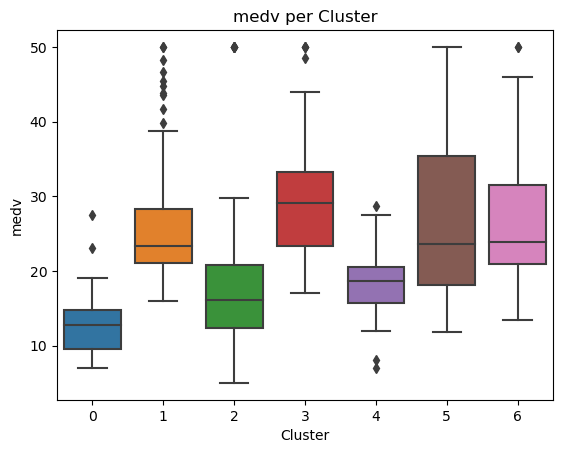

In [13]:
import seaborn as sns
g=sns.boxplot(data=boston_df,y='medv',x='cluster')
g.set_title('medv per Cluster')
g.set_xlabel('Cluster')
g.set_ylabel('medv')

In [14]:
boston_df[boston_df['cluster']==3].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,cluster,pca_x,pca_y
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000
mean,0.050309,65.959677,3.119194,0.016129,0.417145,6.753887,27.740323,7.207811,3.661290,317.161290,16.620968,388.257903,5.899839,29.429032,3.0,-0.815126,-0.422422
std,0.050859,21.555932,1.561154,0.127000,0.019506,0.583013,11.009705,1.724471,1.854932,60.404699,2.062637,11.385636,2.517814,8.264290,0.0,0.139305,0.131624
min,0.009060,22.000000,0.460000,0.000000,0.385000,5.663000,6.800000,3.788600,1.000000,187.000000,12.600000,341.600000,1.980000,17.100000,3.0,-1.132454,-0.716602
25%,0.020205,45.000000,1.797500,0.000000,0.403000,6.385500,19.200000,6.197325,2.000000,268.750000,15.200000,384.340000,4.397500,23.275000,3.0,-0.933178,-0.500831
50%,0.035995,75.000000,2.950000,0.000000,0.411000,6.733500,28.000000,7.172600,4.000000,329.000000,16.500000,392.835000,5.290000,29.050000,3.0,-0.812504,-0.413020
75%,0.067998,80.000000,3.945000,0.000000,0.430500,7.102250,34.425000,8.339200,5.000000,356.250000,17.900000,395.855000,7.170000,33.250000,3.0,-0.707026,-0.356834
max,0.368940,100.000000,6.090000,1.000000,0.484000,8.259000,56.400000,12.126500,7.000000,469.000000,22.000000,396.900000,14.800000,50.000000,3.0,-0.497532,-0.063167


In [15]:
boston_df[boston_df['cluster']==0].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,cluster,pca_x,pca_y
count,35.000000,35.0,3.500000e+01,35.0,35.000000,35.000000,35.000000,35.000000,35.0,35.0,3.500000e+01,35.000000,35.000000,35.000000,35.0,35.000000,35.000000
mean,16.346086,0.0,1.810000e+01,0.0,0.666829,6.076000,90.125714,1.988334,24.0,666.0,2.020000e+01,55.669714,21.007429,12.900000,0.0,1.069671,-0.301756
std,14.789799,0.0,7.209162e-15,0.0,0.056641,0.691216,9.922474,0.358694,0.0,0.0,7.209162e-15,53.016568,6.139928,4.461996,0.0,0.085079,0.072631
min,3.774980,0.0,1.810000e+01,0.0,0.584000,3.863000,59.700000,1.413000,24.0,666.0,2.020000e+01,0.320000,10.110000,7.000000,0.0,0.873345,-0.510611
25%,8.346355,0.0,1.810000e+01,0.0,0.597000,5.915500,85.600000,1.798300,24.0,666.0,2.020000e+01,13.465000,17.155000,9.550000,0.0,1.019096,-0.342223
50%,11.812300,0.0,1.810000e+01,0.0,0.679000,6.202000,93.300000,1.968200,24.0,666.0,2.020000e+01,35.050000,19.780000,12.700000,0.0,1.068232,-0.292597
75%,15.518750,0.0,1.810000e+01,0.0,0.713000,6.493000,100.000000,2.162550,24.0,666.0,2.020000e+01,92.500000,24.030000,14.700000,0.0,1.112242,-0.239434
max,73.534100,0.0,1.810000e+01,0.0,0.740000,6.852000,100.000000,2.871500,24.0,666.0,2.020000e+01,210.970000,36.980000,27.500000,0.0,1.259115,-0.186125


Text(0, 0.5, 'crim')

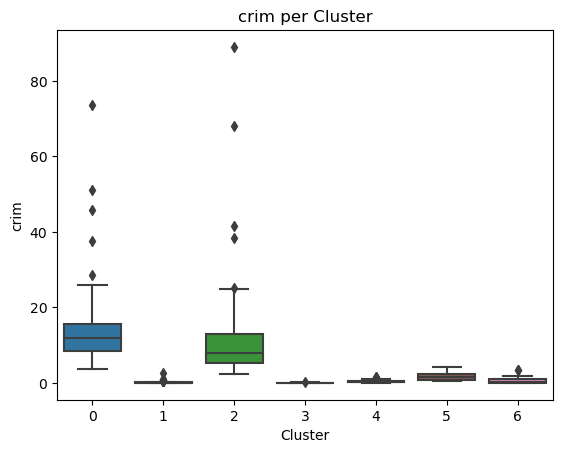

In [16]:
g=sns.boxplot(data=boston_df,y='crim',x='cluster')
g.set_title('crim per Cluster')
g.set_xlabel('Cluster')
g.set_ylabel('crim')